In [ ]:
# AQUÍ ANALIZO SI VALE LA PENA ELIMINAR LOS OUTLIERS Y HACER EL LOG SOBRE LAS COLUMNAS
# CON EL ÍNDICE DE SHAPIRO VEO SI VALE LA PENA HACER O NO ESTE AJUSTE SOBRE LAS COLUMNAS
# LA CONCLUSION ES QUE NO VALE LA PENA HACER ESTE AJUSTE, AL  COMPARARLO EL RESULTADO 
# OBTENIDO EN 'ARCHIVO AGUACATE'

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('df.csv')
df =  df.drop(columns='Unnamed: 0'	)
df.head()

,AveragePrice,4046,XLarge Bags,type,Month,Day,Region,Datetime,Dia_semana
0,1.75,9307.34,0.0,1,1,4,0.00,2015-01-04,Sunday
1,1.49,1189.35,0.0,1,1,4,589.82,2015-01-04,Sunday
2,1.68,161.68,0.0,1,1,4,86.58,2015-01-04,Sunday
3,1.52,3013.04,0.0,0,1,4,151.10,2015-01-04,Sunday
4,1.64,1.27,0.0,1,1,4,216.96,2015-01-04,Sunday


Len original: 18249
Len sin outliers en depth: 18040


c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AveragePrice', ylabel='AveragePrice'>

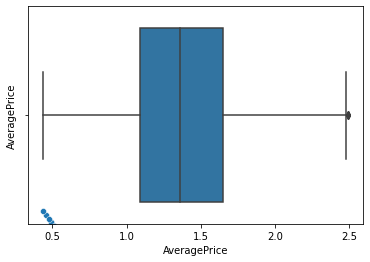

In [5]:
from scipy.stats import iqr
import seaborn as sns

def outliers_quantie(df, feature, param=1.5):  
        
    iqr_ = iqr(df[feature], nan_policy='omit')
    q1 = np.nanpercentile(df[feature], 25)
    q3 = np.nanpercentile(df[feature], 75)
    
    th1 = q1 - iqr_*param
    th2 = q3 + iqr_*param
    
    return df[(df[feature] >= th1) & (df[feature] <= th2)].reset_index(drop=True)

df2 = outliers_quantie(df, 'AveragePrice')
print("Len original:", len(df))
print("Len sin outliers en depth:", len(df2))
sns.scatterplot(data=df2, x='AveragePrice', y='AveragePrice');
sns.boxplot(df2['AveragePrice'])

Len original: 18040
Len sin outliers en depth: 15536
AxesSubplot(0.125,0.125;0.775x0.755)


c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AveragePrice', ylabel='AveragePrice'>

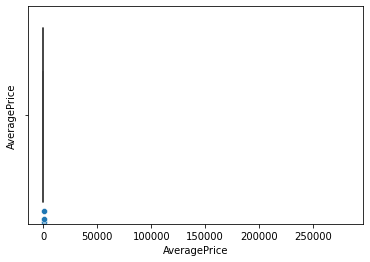

In [6]:
from scipy.stats import iqr
import seaborn as sns

def outliers_quantie(df, feature, param=1.5):  
        
    iqr_ = iqr(df[feature], nan_policy='omit')
    q1 = np.nanpercentile(df[feature], 25)
    q3 = np.nanpercentile(df[feature], 75)
    
    th1 = q1 - iqr_*param
    th2 = q3 + iqr_*param
    
    return df[(df[feature] >= th1) & (df[feature] <= th2)].reset_index(drop=True)

df3 = outliers_quantie(df2, '4046')
print("Len original:", len(df2))
print("Len sin outliers en depth:", len(df3))
print(sns.scatterplot(data=df3, x='4046', y='AveragePrice'))
sns.boxplot(df3['AveragePrice'])

Len original: 15536
Len sin outliers en depth: 11894


c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


<AxesSubplot:xlabel='XLarge Bags', ylabel='AveragePrice'>

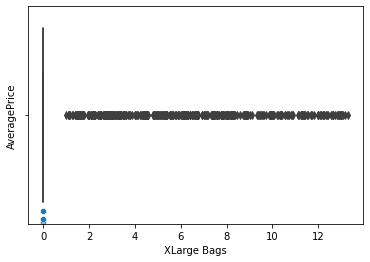

In [7]:
from scipy.stats import iqr
import seaborn as sns

def outliers_quantie(df, feature, param=1.5):  
        
    iqr_ = iqr(df[feature], nan_policy='omit')
    q1 = np.nanpercentile(df[feature], 25)
    q3 = np.nanpercentile(df[feature], 75)
    
    th1 = q1 - iqr_*param
    th2 = q3 + iqr_*param
    
    return df[(df[feature] >= th1) & (df[feature] <= th2)].reset_index(drop=True)

df4 = outliers_quantie(df3, 'XLarge Bags')
print("Len original:", len(df3))
print("Len sin outliers en depth:", len(df4))
print(sns.scatterplot(data=df4, x='XLarge Bags', y='AveragePrice'))
sns.boxplot(df4['XLarge Bags'])

1.38905231432303e-23


c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Asimetria: 0.20142634925813


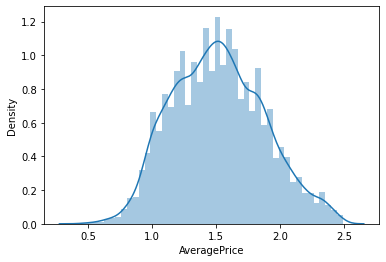

In [8]:
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import skew

print(shapiro(df4['AveragePrice']).pvalue)
sns.distplot(df4['AveragePrice'])
# axes[0].set_title("Original target")
print("Asimetria:", skew(df4['AveragePrice']))

4.228331702930403e-31
Asimetria: -0.40582188052842916


c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


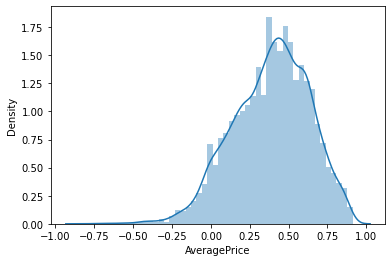

In [9]:


df4['AveragePrice'] = np.log(df4['AveragePrice'])

print( shapiro(df4['AveragePrice']).pvalue)
sns.distplot(df4['AveragePrice'])
# axes[0].set_title("Original target")
print("Asimetria:", skew(df4['AveragePrice']))

0.0
Asimetria: 2.7094898825384024


c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='4046', ylabel='Density'>

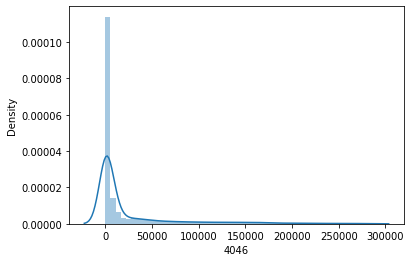

In [10]:
print(shapiro(df4['4046']).pvalue)
print("Asimetria:", skew(df4['4046']))
sns.distplot(df4['4046'])

In [11]:
df4['4046'] = np.log(df4['4046'])

print( shapiro(df4['4046']).pvalue)
print("Asimetria:", skew(np.log(df4['4046'])))



1.0
Asimetria: nan


c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:

print( shapiro(df4['XLarge Bags']).pvalue)
print("Asimetria:", skew(np.log(df4['XLarge Bags'])))

0.0
Asimetria: nan


c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:951: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


In [13]:
#Según veo correr los datos de manera logarítmica no mejora la distribución de los datos antes de aplicar ningún modelo

c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.0
Asimetria: 0.11569001985523615


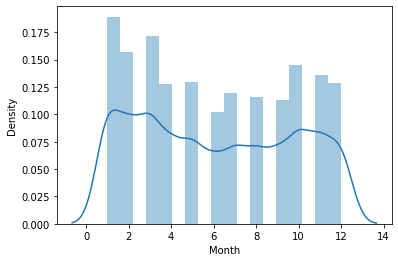

In [14]:
print(shapiro(df4['Month']).pvalue)
sns.distplot(df4['Month'])
# axes[0].set_title("Original target")
print("Asimetria:", skew(df4['Month']))

In [15]:
df4['Month'] = np.log(df4['Month'])

0.0
Asimetria: -0.7280309179684601


c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\enriq\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


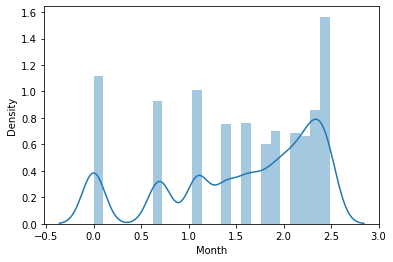

In [16]:
print(shapiro(df4['Month']).pvalue)
sns.distplot(df4['Month'])
# axes[0].set_title("Original target")
print("Asimetria:", skew(df4['Month']))